### Description: Implement K-Means clustering to group data points into clusters without labels (e.g.,customer segmentation).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
Iris = pd.read_csv('Iris.csv')
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Drop 'Id' and 'Species' columns (if present) for clustering
X = Iris.drop(['Id', 'Species'], axis=1, errors='ignore')
feature_names = X.columns
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

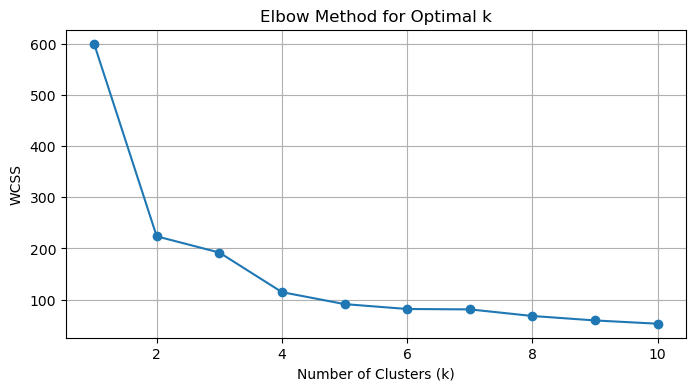

In [19]:
# 1. Determine optimal number of clusters using Elbow Method
# within-cluster sum of squares (WCSS)

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

#### Identifying the Elbow

* The "elbow" is the point where the rate of decrease in WCSS slows down significantly. In this plot, it appears around **k=3**:
   * From **k=1** to **k=2**, WCSS drops from ~600 to ~300 (a steep decline).
   * From **k=2** to **k=3**, it drops from ~300 to ~200 (still significant but less steep).
   * Beyond **k=3**, the decrease becomes more gradual (e.g., ~200 to ~150 from **k=3** to **k=4**), suggesting that additional clusters add little improvement.
* This elbow at **k=3** indicates that three clusters are likely optimal, which aligns with the known structure of the Iris dataset (three species: setosa, versicolor, virginica).

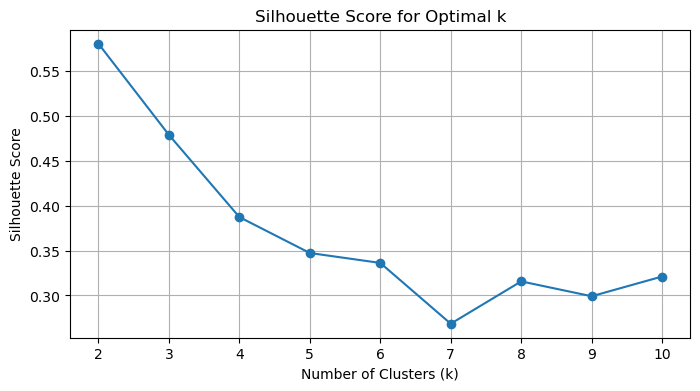

In [11]:
# 2. Determine optimal number of clusters using Silhouette Score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    sil_scores.append(sil_score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [12]:
# 3. Apply K-Means with optimal k (e.g., k=3 based on plots)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
cluster_labels

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [30]:
# 4. Dimensionality reduction using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [31]:
# Create DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels
df_pca.head()

,PC1,PC2,Cluster
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,2
2,-2.367950,-0.318477,2
3,-2.304197,-0.575368,2
4,-2.388777,0.674767,1


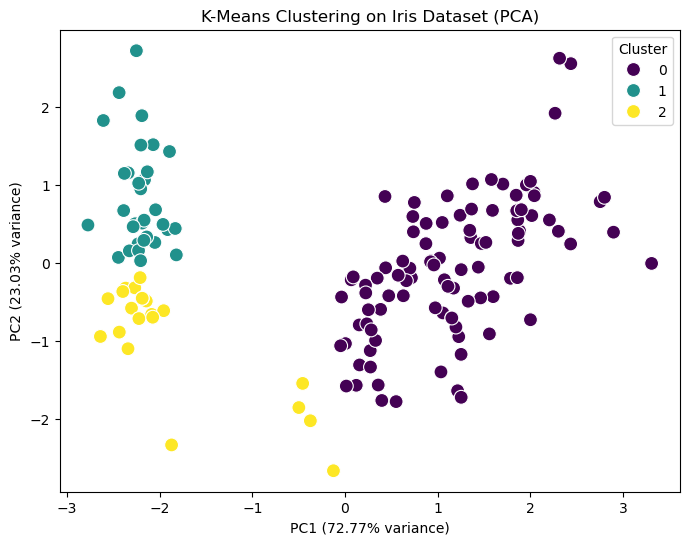

In [24]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering on Iris Dataset (PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(title='Cluster')
plt.show()

In [22]:
# 5. Interpret results: Summarize cluster characteristics
# Add cluster labels to original data
df = X.copy()
df['Cluster'] = cluster_labels
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1


In [17]:
# Compute mean values for each cluster
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Summary (Mean Values):")
print(cluster_summary)


Cluster Summary (Mean Values):
         SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Cluster                                                          
0             6.314583      2.895833       4.973958      1.703125
1             5.178125      3.631250       1.496875      0.278125
2             4.754545      2.904545       1.745455      0.336364
